In [3]:
import pandas as pd
import numpy as np
import datetime
import pickle
import time
import networkx as nx
import sys
import csv
from z3 import *
from bidict import bidict
import matplotlib.pyplot as plt
import tldextract
import json
import random
from collections import Counter
#from hdt import HDTDocument, IdentifierPosition
import glob
from urllib.parse import urlparse
import gzip
# from extend_metalink import *
import requests
from requests.exceptions import Timeout

In [4]:
G = nx.Graph()

In [5]:
def read_file (file_name):
	eq_file = open(file_name, 'r', errors="ignore") #without errors=ignore : UnicodeDecodeError
	reader = csv.DictReader(eq_file, delimiter='\t',)
	for row in reader:
		G.add_node(row["Entity"], Annotation = row["Annotation"], Comment = row["Comment"])

In [6]:
def add_edges (file_name):
    eq_file = open(file_name, 'r', errors="ignore")
    reader = csv.DictReader(eq_file, delimiter='\t',)
    for row in reader:
        G.add_edge(row["SUBJECT"], row["OBJECT"], METALINK_ID = row["METALINK_ID"])

In [7]:
read_file('1133953.tsv')
add_edges('1133953_edges.tsv')

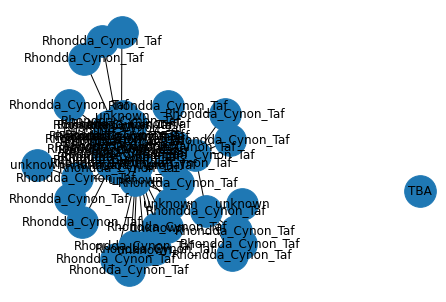

In [9]:
labels = nx.get_node_attributes(G, 'Annotation')
nx.draw(G, labels=labels, node_size=1000)